In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
%matplotlib inline


In [2]:
df = pd.read_csv("kc_house_data.csv")

https://en.wikipedia.org/wiki/King_County,_Washington
https://www.seattletimes.com/business/real-estate/why-are-seattle-area-home-prices-so-high/

Aims to keep in mind:
We need pick at least 3 coefficients for your final model of house price
Explain their impact on the price of a house in this dataset.
Your model should not include any predictors with p-values greater than .05.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


^ gives us a general overview to spot any problems with the data
There is no data that is negative when it should be positive
A house with 33 bedrooms! worth checking out in case its an anomoly
describe() not showing date column (expected, as this may be a datetime object)§
describe() not showing sqft_basement column, which is interesting and needs a look at 

In [6]:
df.shape

(21597, 21)

# Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - The year the house was most recently sold
* **pricePrice** -  is prediction target (so is this not sales price?)
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  square footage of the home
* **sqft_lotsquare** -  square footage of the lot (ie the size of the land the house is on)
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront 
* **view** - Has been viewed (given as a number of views, most viewed house has 4)
* **condition** - How good the condition is ( Overall ) (ranked from 1 to 5)
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate (worth noting these are negative latitudes)
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Shows that we have null values in the waterfront, view, and yr_renovated columns

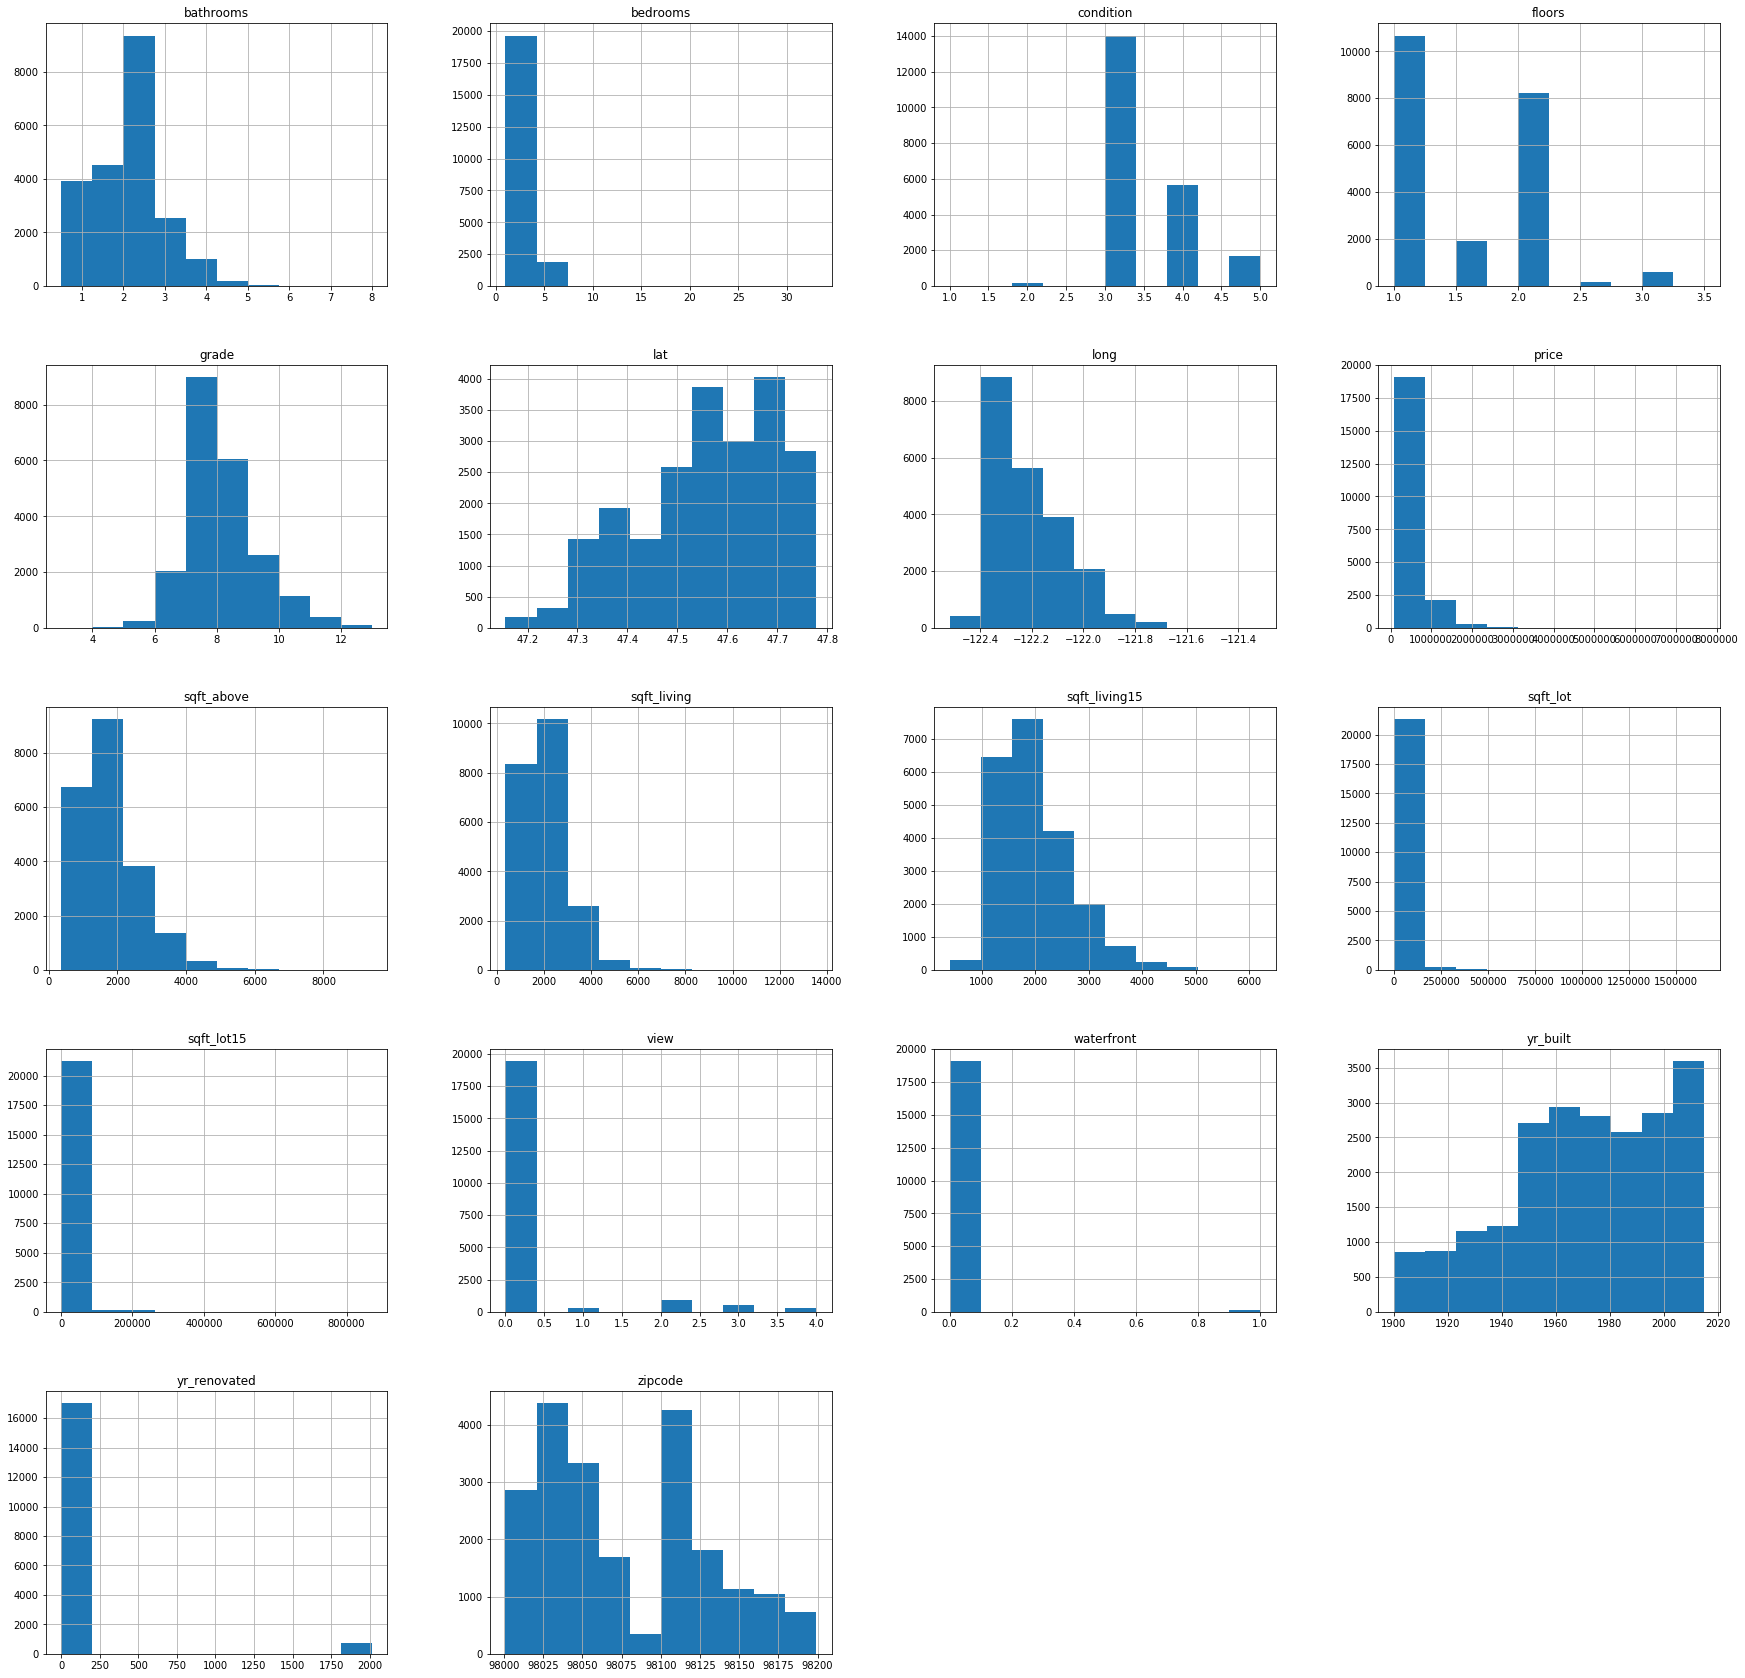

In [8]:
df_subset1 = df.drop(columns=["id", "date"], axis = 1)
df_subset1.hist(figsize  = [30, 30])
plt.show()


Helping us get to know the data better, nothing looks too out of the ordinary here
yr_renovated used 0 as a value for 'never renovated' which will make that data less useful unless adressed

In [9]:
duplicates = df.duplicated(subset=["id"], keep="first")
display(duplicates.value_counts())
print("\n")
duplicates = df.duplicated(subset=["id", "date"], keep="first")
display(duplicates.value_counts())

False    21420
True       177
dtype: int64

False    21597
dtype: int64

This suggests that we dont have duplicate entries
177 properties were resold

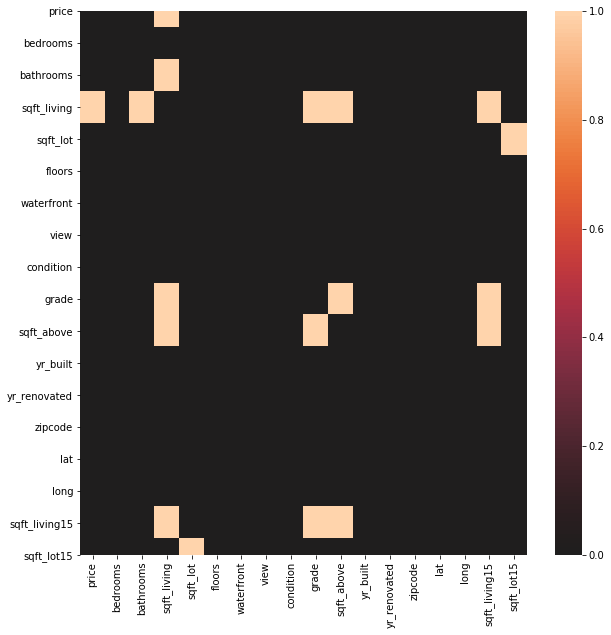

In [11]:
for x in list(df.columns):
    print(df[x].value_counts().head(10))

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
3/25/2015    123
7/9/2014     121
4/14/2015    121
4/28/2015    121
4/22/2015    121
Name: date, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: price, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
Name: bathrooms, dtype: int64
1300    138
1400    135
1440    133
1660    129
1010    129
1800    129
1820    128
1480    125
1720    125
1540    124
Name: sqft_living

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

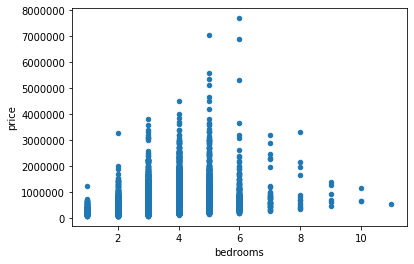

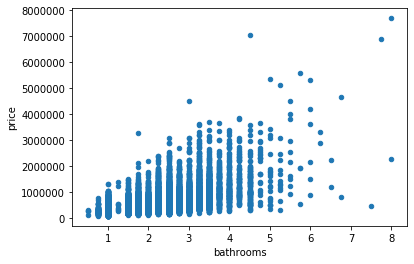

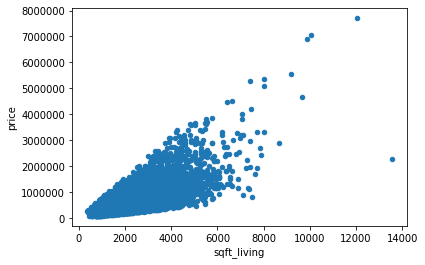

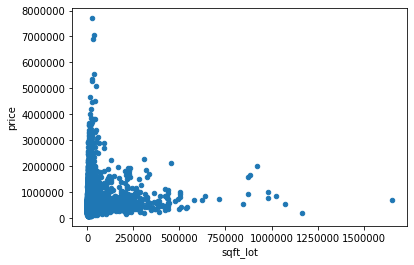

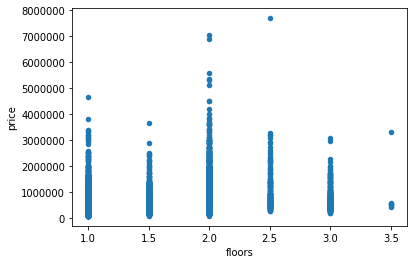

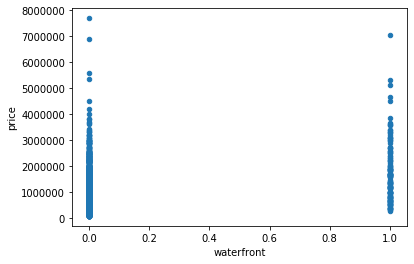

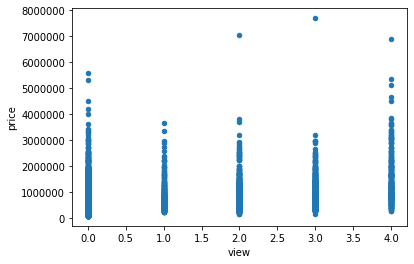

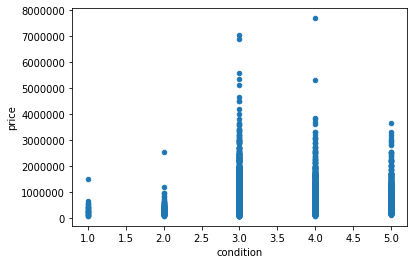

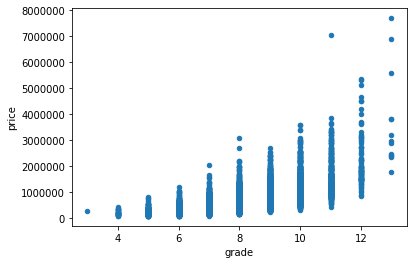

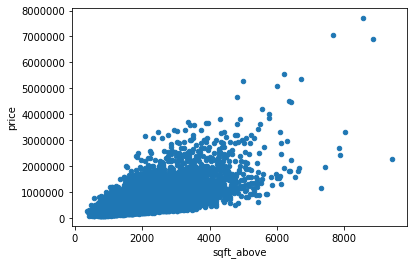

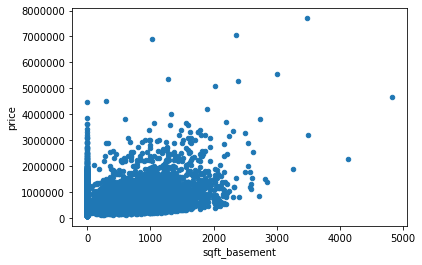

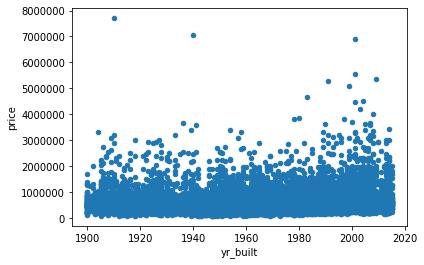

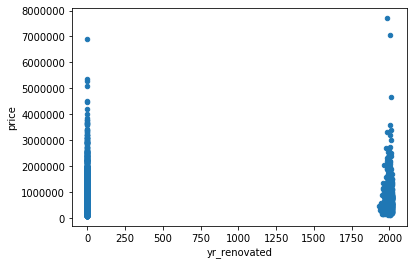

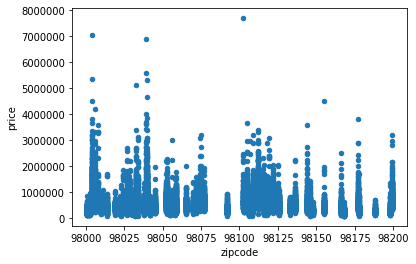

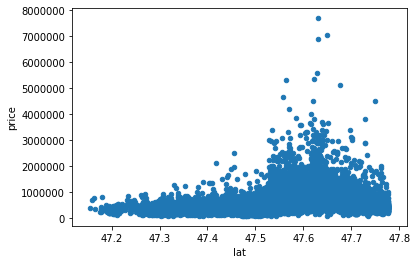

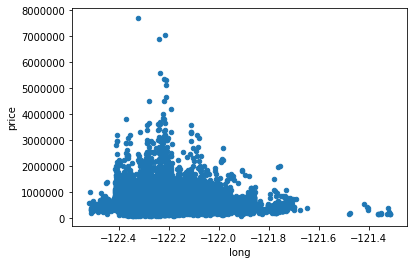

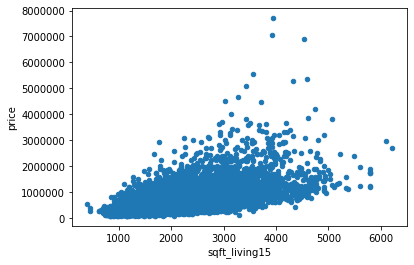

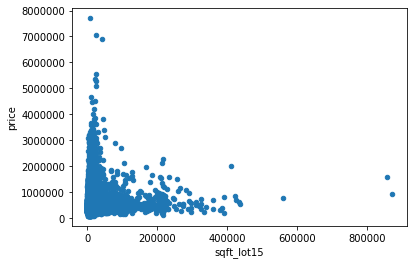

In [110]:
for x in ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    df.plot.scatter(x,'price')

In [ ]:
Dealing with a few outliers:

In [ ]:
df.loc[df["bedrooms"]==33]

In [ ]:
df.loc[df["sqft_living"]==1620].sort_values('bedrooms')

In [ ]:
Enough evidence to change the bedroom to a 3 bedroom house!

This is checking to see if there are any suspiciously common values
This might indicate there are placement values
sqft_basement has a ? placement value

In [12]:
df.loc[df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


The house with 33 bedroom looks alot like a house with 3 bedrooms! Possible typing error?

In [13]:
df.loc[df["sqft_living"]==1620].sort_values('bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4353,3364900375,4/23/2015,750000.0,2,1.00,1620,6120,1.0,0.0,0.0,...,7,1620,0.0,1951,0.0,98115,47.6731,-122.326,1650,4590
18828,4443800785,11/21/2014,481000.0,2,1.00,1620,3880,1.0,0.0,0.0,...,7,920,700.0,1924,0.0,98117,47.6855,-122.391,1330,3880
20139,3629960680,9/26/2014,395000.0,2,2.25,1620,1841,2.0,0.0,0.0,...,8,1540,80.0,2004,0.0,98029,47.5483,-122.004,1530,1831
18249,6600220090,11/18/2014,475000.0,2,2.50,1620,14467,2.0,0.0,0.0,...,7,1620,0.0,1981,0.0,98074,47.6306,-122.035,1470,13615
9228,3524039144,10/7/2014,700000.0,2,1.00,1620,9855,1.0,0.0,4.0,...,8,1320,300.0,1948,0.0,98136,47.5264,-122.384,1820,7700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,9542840570,4/1/2015,305000.0,4,2.50,1620,4000,2.0,0.0,0.0,...,7,1620,0.0,2008,0.0,98038,47.3661,-122.020,1580,3780
16505,4036801315,11/4/2014,425000.0,4,1.50,1620,7875,1.0,0.0,0.0,...,7,1620,0.0,1956,0.0,98008,47.6041,-122.126,1890,8400
9276,3856904610,10/2/2014,485000.0,4,1.00,1620,4080,1.5,0.0,0.0,...,7,1620,0.0,1923,NaN,98105,47.6696,-122.324,1760,4080
11457,2826049200,8/25/2014,451000.0,4,1.50,1620,5444,1.5,0.0,0.0,...,8,1620,0.0,1955,0.0,98125,47.7065,-122.297,1620,6912


By looking at all the other similarly sized houses (by sqft) we can clearly see that the 33 bedroom house is a weird exception. We have a good arguement for just changing it to a 3 bedroom house. We also looked at the Latitude and Logitude and it was not a 3 bedroom house in that location, it was no bigger than any other houses near it. 

In [ ]:
9 bed 7.5 bathroom house in Seattle city centre $450k, except mean is $600k and its by far the biggest house in the neighbourhood
drop it!

In [ ]:
We also drop a sqft_living = 13540 for $2.28mil in the outskirts and a sqft_lot = 1651359 for $700k, although they may be priced correctly
Logically, we weren't sure how there could be 2 values of sqft_lot15 that were so massive (800000>), so we removed them too
They are so weird that it is worth sacking them 

More interesting findings:
1 - 'waterfront', 'view' an 'yr_renovated' columns have null values that need dealing with 
2 - We need to work on the ?s in the basement situation and check that the two square foots add to total sqr foot
3 - 'yr_renovated' 0.0 needs addressing
4 - Consider adjusting prices with interest rate for that year (maybe later)

In [14]:
df_test = df.copy()
df_test['waterfront'].fillna(value=2, inplace=True)
df_test.groupby('waterfront')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0.0,19075.0,5.326420e+05,3.449592e+05,78000.0,320000.0,450000.0,638600.0,7700000.0
1.0,146.0,1.717215e+06,1.145385e+06,285000.0,827500.0,1510000.0,2282500.0,7060000.0
2.0,2376.0,5.294301e+05,3.250794e+05,80000.0,322875.0,445000.0,649612.5,3200000.0


This shows us that the null values for the waterfront column closely align to the values for no waterfront view
This is our justification for reassigning the null value to zero, instead of to the mean or median 

In [15]:
df['waterfront'].fillna(value=0, inplace=True)
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

Waterfront column cleaned!

In [16]:
df_test = df.copy()
df_test['view'].fillna(value=10, inplace=True)
df_test.groupby('view')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
view,,,,,,,,
0.0,19422.0,4.968061e+05,287419.959567,78000.0,311525.0,432500.0,600000.0,5570000.0
1.0,330.0,8.133733e+05,512776.626107,217000.0,498250.0,691944.0,923750.0,3650000.0
2.0,957.0,7.913904e+05,510385.693444,169317.0,485000.0,675000.0,938000.0,7060000.0
3.0,508.0,9.732852e+05,613898.399842,154000.0,558000.0,802500.0,1260000.0,7700000.0
4.0,317.0,1.452466e+06,930747.701932,252000.0,815000.0,1180000.0,1850000.0,6890000.0
10.0,63.0,6.219582e+05,680927.087594,144000.0,322475.0,480000.0,679000.0,5300000.0


This shows us that the null values for the price column closely align to the values for zero views
This is our justification for reassigning the null value to zero, instead of to the mean or median 

In [17]:
df['view'].fillna(value=0, inplace=True)

For now, we are going to leave the yr-renovated column, as it is so overwhelmingly 'not renovated' 
If we find a reason to consider it as part of our model, we will attempt to clean it!

Next, we will address the ? in the basement column. 
We will replicate column basement into a new column (basement2).
We will add a check_flr column to check if above + basement2 = living.
We will check to see if above + basement2 != living occur when there are ?'s or occur throughout the data.
We will reassign all the incorrect basement values to be living - above.

In [18]:
#replicated column basement (basement2), placeholder 0 for ?
#added check_flr column to check if above + basement2 = living
#above + basement2 != living were ? basement
#therefore basement = ? should be living - above
display(df["sqft_basement"].value_counts().head())
df["sqft_basement2"] = df.sqft_basement
df["sqft_basement2"].replace(to_replace = "?", value = 0, inplace = True)
display(df["sqft_basement2"].dtype)
df["sqft_basement2"] = df["sqft_basement2"].astype(dtype = "float64")
df["check_flr"] = pd.Series(df["sqft_above"] + df["sqft_basement2"] == df["sqft_living"])
display(df[["sqft_above","sqft_living", "sqft_basement", "check_flr", "sqft_basement2"]].loc[df["check_flr"] == False].head())
display(df[["sqft_above","sqft_living", "sqft_basement", "check_flr", "sqft_basement2"]].loc[df["check_flr"] == False]["sqft_basement"].value_counts())
display(df["sqft_basement"].value_counts())

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

dtype('O')

,sqft_above,sqft_living,sqft_basement,check_flr,sqft_basement2
112,1160,1540,?,False,0.0
115,2780,4380,?,False,0.0
309,2220,3320,?,False,0.0
384,3480,4800,?,False,0.0
508,820,1540,?,False,0.0


?    170
Name: sqft_basement, dtype: int64

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
225.0         1
1481.0        1
2050.0        1
1135.0        1
861.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [19]:
# df["sqft_basement"].loc[df["sqft_basement"] == "?"].map(lambda x: ["sqft_living"] - ["sqft_above"])
df["sqft_basement"] =  df["sqft_living"] - df["sqft_above"]
display(df["sqft_basement"].value_counts())

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [20]:
df.drop(columns = ["check_flr", "sqft_basement2"], inplace = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [21]:
display(df["sqft_basement"].value_counts())

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

We have found all the houses where the sqft_above + sqft_basement doesn't equal sqft_living. It only happens when there are ? involved. In those cases, we have reassigned the ? to be the correct values, so that they satify the equation!

In [22]:
df.iloc[15856, df.columns.get_loc('bedrooms')] = 3

In [23]:
df.iloc[15856, df.columns.get_loc('bedrooms')]

3

We have reassigned the 33 bedroom house to have 3 bedrooms because of the above logic

4 - 'yr_renovated' 0.0 needs addressing, but as we currently arent thinking to use it in our model, we are ignoring it

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(12), object(1)
memory usage: 3.5+ MB


In [25]:
for x in list(df.columns):
    print(df[x].value_counts().head(10))

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
3/25/2015    123
7/9/2014     121
4/14/2015    121
4/28/2015    121
4/22/2015    121
Name: date, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: price, dtype: int64
3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
Name: bathrooms, dtype: int64
1300    138
1400    135
1440    133
1660    129
1010    129
1800    129
1820    128
1480    125
1720    125
1540    124
Name: sqft_living

Now we have clean enough data! LIES

In [26]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.002342,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.315954,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.323799,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.002342,0.315954,1.000000,0.527874,0.593182,0.033606,0.183721,-0.002053,0.080747,0.023390,0.366181,0.492549,0.309244,0.160748,0.019434,-0.158596,-0.011612,0.136574,0.404540,0.031898
bathrooms,0.005162,0.525906,0.527874,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.283440,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.593182,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.033606,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015418,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.183721,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002053,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.082800,-0.024487,0.081397,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.080747,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.273845,-0.054452,0.100977,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.023390,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


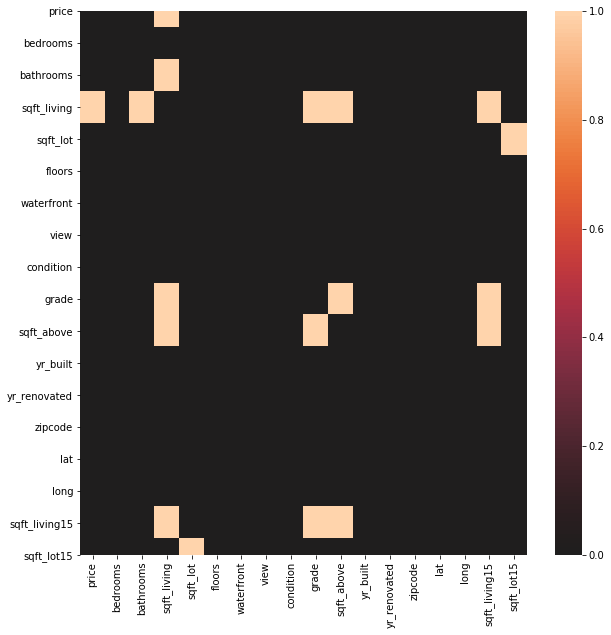

In [128]:
plt.figure(figsize = (10,10))
sns.heatmap((((df_subset1.corr() >= 0.7) | (df_subset1.corr() <= -0.7)) & (df_subset1.corr() != 1)), center=0)

In [27]:
display(df.head())
display(df.columns)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [28]:
#create a subset of all possible predictors

In [29]:
df_pred = df[['sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15','yr_built','condition', 'waterfront', 'zipcode']]
df_pred.head()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,yr_built,condition,waterfront,zipcode
0,1180,5650,1340,5650,1955,3,0.0,98178
1,2570,7242,1690,7639,1951,3,0.0,98125
2,770,10000,2720,8062,1933,3,0.0,98028
3,1960,5000,1360,5000,1965,5,0.0,98136
4,1680,8080,1800,7503,1987,3,0.0,98074


In [30]:
df_pred.describe()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,yr_built,condition,waterfront,zipcode
count,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,2080.321850,1.509941e+04,1986.620318,12758.283512,1970.999676,3.409825,0.006760,98077.951845
std,918.106125,4.141264e+04,685.230472,27274.441950,29.375234,0.650546,0.081944,53.513072
min,370.000000,5.200000e+02,399.000000,651.000000,1900.000000,1.000000,0.000000,98001.000000
25%,1430.000000,5.040000e+03,1490.000000,5100.000000,1951.000000,3.000000,0.000000,98033.000000
50%,1910.000000,7.618000e+03,1840.000000,7620.000000,1975.000000,3.000000,0.000000,98065.000000
75%,2550.000000,1.068500e+04,2360.000000,10083.000000,1997.000000,4.000000,0.000000,98118.000000
max,13540.000000,1.651359e+06,6210.000000,871200.000000,2015.000000,5.000000,1.000000,98199.000000


In [31]:
#transform categorical predictor: zipcode and yr_built

In [32]:
display(df_pred["zipcode"].nunique(dropna = False))
display(df_pred["zipcode"].describe())

70

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [33]:
zipcode_series = pd.Series(df_pred["zipcode"])
cat_zipcode = zipcode_series.astype('category')

In [34]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
zipcode_encoded = lb_make.fit_transform(cat_zipcode)

In [35]:
#replace column zipcode with zipcode encounded

In [36]:
df_pred_scaled = pd.DataFrame()

df_pred_scaled['zipcode_scaled'] = pd.Series(zipcode_encoded)
df_pred_scaled.head()

,zipcode_scaled
0,66
1,55
2,16
3,58
4,37


In [37]:
display(df_pred["yr_built"].nunique(dropna = False))
display(df_pred["yr_built"].describe())

116

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [38]:
yr_built_series = pd.Series(df_pred["yr_built"])
cat_yr_built = yr_built_series.astype('category')
lb_make = LabelEncoder()
yr_built_encoded = lb_make.fit_transform(cat_yr_built)

In [39]:
df_pred_scaled['yr_built_scaled'] = pd.Series(yr_built_encoded)
df_pred_scaled.head()

,zipcode_scaled,yr_built_scaled
0,66,55
1,55,51
2,16,33
3,58,65
4,37,87


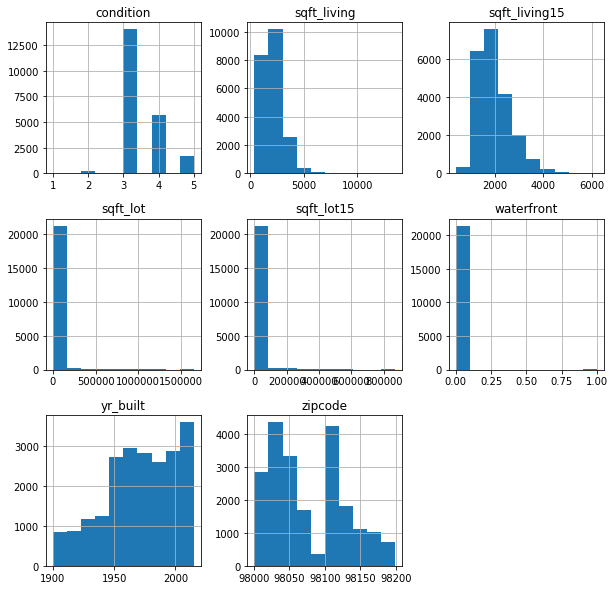

In [40]:
df_pred.hist(figsize  = [10, 10]); 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c27638dd0>,
      dtype=object)

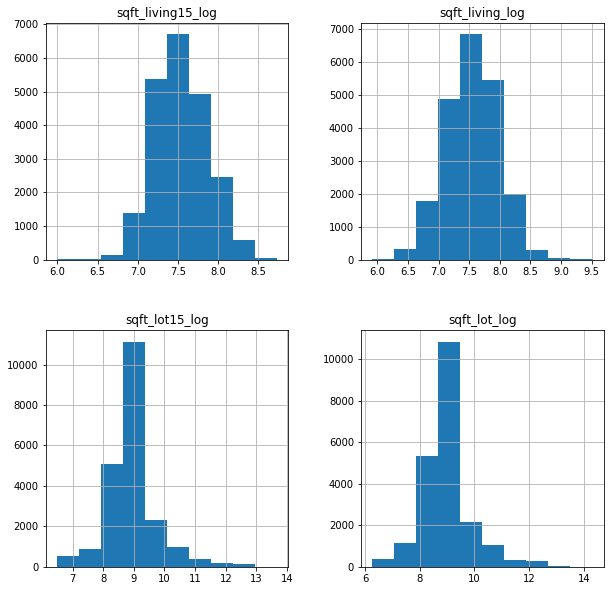

In [41]:
df_pred_log = pd.DataFrame()

for x in ['sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15']:
     df_pred_log[x+"_log"] = df_pred[x].map(lambda x: np.log(x))
df_pred_log.hist(figsize  = [10, 10])

In [42]:
display(df_pred.columns)
display(df_pred_log.columns)

Index(['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'yr_built',
       'condition', 'waterfront', 'zipcode'],
      dtype='object')

Index(['sqft_living_log', 'sqft_lot_log', 'sqft_living15_log',
       'sqft_lot15_log'],
      dtype='object')

In [43]:
df_final = pd.concat([df, df_pred_scaled, df_pred_log], axis =1)
df_final.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode_scaled',
       'yr_built_scaled', 'sqft_living_log', 'sqft_lot_log',
       'sqft_living15_log', 'sqft_lot15_log'],
      dtype='object')

In [44]:
df_working = df_final.copy()
df_working.drop(columns= ['id', 'date','bedrooms', 'bathrooms', 'floors','view','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis = 1, inplace=True)
df_working.head()

,price,sqft_living,sqft_lot,waterfront,condition,grade,zipcode_scaled,yr_built_scaled,sqft_living_log,sqft_lot_log,sqft_living15_log,sqft_lot15_log
0,221900.0,1180,5650,0.0,3,7,66,55,7.073270,8.639411,7.200425,8.639411
1,538000.0,2570,7242,0.0,3,7,55,51,7.851661,8.887653,7.432484,8.941022
2,180000.0,770,10000,0.0,3,6,16,33,6.646391,9.210340,7.908387,8.994917
3,604000.0,1960,5000,0.0,5,7,58,65,7.580700,8.517193,7.215240,8.517193
4,510000.0,1680,8080,0.0,3,8,37,87,7.426549,8.997147,7.495542,8.923058


In [103]:
formula = "price~waterfront+lat+yr_built+sqft_living_log+grade"
model = ols(formula = formula, data = df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     7237.
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:35:53   Log-Likelihood:            -2.9676e+05
No. Observations:               21597   AIC:                         5.935e+05
Df Residuals:                   21591   BIC:                         5.936e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.183e+07   5.81e+05    -37.593      0.000    -2.3e+07   -2.07e+07
waterfront       8.722e+05   1.88e+04     46.441      0.000    8.35e+05    9.09e+05
lat              5.331e+05   1.14e+04     46.667      0.000    5.11e+05    5.56e+05
yr_built        -3095.8852     59.893    -51.690      0.000   -3213.279   -2978.491
sqft_living_log  2.427e+05   5398.620     44.948      0.000    2.32e+05    2.53e+05
grade            1.665e+05   2082.318     79.953      0.000    1.62e+05    1.71e+05
==============================================================================
Omnibus:                    21659.261   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3638152.906
Skew:                           4.550   Prob(JB):                         0.00
Kurtosis:                      65.930   Cond. No.                     7.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
predictors = df_final.drop(['price','date','yr_renovated'], axis=1)
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(predictors, df_working['price'])

In [99]:
selector.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,  True, False, False, False])

In [76]:
predictors.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'zipcode_scaled', 'yr_built_scaled', 'sqft_living_log',
       'sqft_lot_log', 'sqft_living15_log', 'sqft_lot15_log'],
      dtype='object')

In [87]:
selector.ranking_

array([24, 16, 12,  9, 22, 18,  3, 13, 14,  6, 11, 10,  1, 20,  4,  7, 21,
       23, 19,  2,  5, 17,  8, 15])